In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from utils.plotData import plotData 
from utils.computeCost import computeCost 
from utils.gradientDescent import gradientDescent 
from utils.plotting_help import plot_3d, contour_plot

Loading Data ...





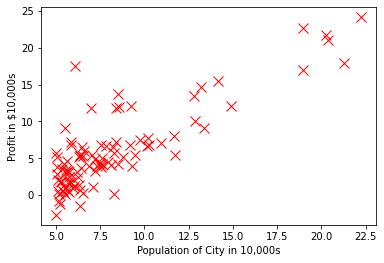

In [2]:
#### Import Data
print('Loading Data ...\n\n\n')
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,0]
y = data[:,1]

m = len(y)

#### Plot Data 
plotData (X,y)

In [3]:
X_zero = np.ones((m,1)) #initialize X0
X_padded = np.hstack((X_zero,np.transpose([X]))) #pad features

theta = np.zeros(2)# initialize fitting parameters

iterations = 1500 
alpha = 0.01

#### Test cost function with theta = [0,0]
print('Testing the cost fucntion ...\n')
J = computeCost (theta,X_padded,y)

print('With theta = [0 ; 0]\nCost computed = {:.3f}'.format(J))
print('Expected cost value (approx): 32.07\n\n')

#### Test cost function with theta = [-1,2]
new_theta = np.array((-1,2))
J2 = computeCost (new_theta, X_padded,y)

print('With theta = [-1 ; 2]\nCost computed = {:.3f}'.format(J2))
print('Expected cost value (approx): 54.24\n\n')

Testing the cost fucntion ...

With theta = [0 ; 0]
Cost computed = 32.073
Expected cost value (approx): 32.07


With theta = [-1 ; 2]
Cost computed = 54.242
Expected cost value (approx): 54.24




In [4]:
#### Test cost function with theta = [0,0]
print('Testing the cost fucntion ...\n')
J = computeCost (X_padded,y,theta)

print('With theta = [0 ; 0]\nCost computed = {:.3f}'.format(J))
print('Expected cost value (approx): 32.07\n\n')

#### Test cost function with theta = [-1,2]
new_theta = np.array([[-1],[2]])
J2 = computeCost (X_padded,y,new_theta)

print('With theta = [-1 ; 2]\nCost computed = {:.3f}'.format(J2))
print('Expected cost value (approx): 54.24\n\n')

Testing the cost fucntion ...

With theta = [0 ; 0]
Cost computed = 10119271.549
Expected cost value (approx): 32.07


With theta = [-1 ; 2]
Cost computed = 20235093.950
Expected cost value (approx): 54.24




In [5]:
# run gradient descent
print('Running Gradient Descent ...')

theta_fit,J_history = gradientDescent(X_padded, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: {}'.format(theta_fit));
print('Expected theta values (approx): -3.6303, 1.1664\n\n');

Running Gradient Descent ...
Theta found by gradient descent: [-3.63029144  1.16636235]
Expected theta values (approx): -3.6303, 1.1664




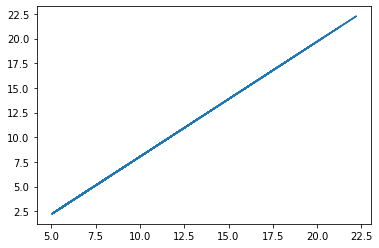

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


In [6]:
#### Test linear fit

plt.plot(X, np.dot(X_padded,theta_fit), label = 'Linear Fit')
plt.show()


#### Predict Studies

predict1 = np.array([1, 3.5]).dot(theta_fit)
print("For population = 35,000, we predict a profit of {:f}".format(float(predict1*10000)))
predict2 = np.array([1, 7]).dot(theta_fit)
print('For population = 70,000, we predict a profit of {:f}'.format(float(predict2*10000)))

In [7]:
template = np.poly1d(theta_fit)
template

poly1d([-3.63029144,  1.16636235])

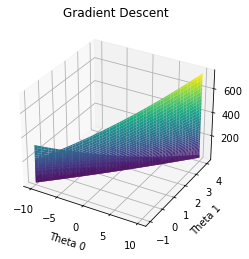

In [8]:
##### Visualing J(theta_0, theta_1)

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for ii in range(len(theta0_vals)):
    for jj in range(len(theta1_vals)):
        t= np.array([theta0_vals[ii], theta1_vals[jj]])
        J_vals[ii,jj] = computeCost(t, X_padded, y)
        
J_vals = J_vals.T

plot_3d(theta0_vals, theta1_vals, J_vals)

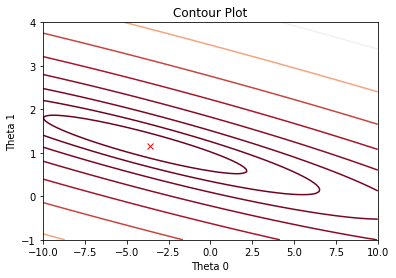

In [9]:
contour_plot(theta_fit, theta0_vals, theta1_vals, J_vals)


Model Intercept: [-4.44418673]
Model Intercept: [[1.23861612]]
Model Accuracy: 0.5919875809297939


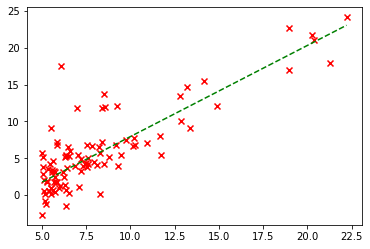

In [10]:
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train,y_train)
accuracy = model.score(X_test,y_test)

print("Model Intercept: {}".format(model.intercept_))
print("Model Intercept: {}".format(model.coef_))
print("Model Accuracy: {}".format(accuracy))
plt.scatter(X,y,color="red",marker="x")

xfit = np.linspace(np.min(X),np.max(X)).reshape(-1,1)
yfit = model.predict(xfit)
plt.plot(xfit,yfit,linestyle="--",color="green")